In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
# 0 is black, 1 is white, -1 is empty

In [22]:
def init():
    """
    Set up the checkers board
    """
    board = np.ones((8,8), dtype=np.int)*(-1)
    # init whites
    board[[0,2],1::2] = 1
    board[1,::2] = 1
    # init blacks
    board[[5,7],::2] = 0
    board[6,1::2] = 0
    return board

In [23]:
board = init()

In [24]:
def win(board, player):
    # player wins when other player has no pieces left
    return not (board == 1-player).any()

In [25]:
board

array([[-1,  1, -1,  1, -1,  1, -1,  1],
       [ 1, -1,  1, -1,  1, -1,  1, -1],
       [-1,  1, -1,  1, -1,  1, -1,  1],
       [-1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1],
       [ 0, -1,  0, -1,  0, -1,  0, -1],
       [-1,  0, -1,  0, -1,  0, -1,  0],
       [ 0, -1,  0, -1,  0, -1,  0, -1]])

In [26]:
def move(board, player, move, in_place = True):
    """
    Return new state of board after performing a move
    """
    prev_pos, next_pos = move
    i,j = prev_pos
    ii,jj = next_pos
    assert board[i,j] == player
    assert board[ii,jj] == -1
    if in_place:
        board[i,j] = -1
        board[ii,jj] = player
        return board
    else:
        new_board = board.copy()
        new_board[i,j] = -1
        new_board[ii,jj] = player
        return new_board

In [27]:
board[5,0]

0

In [28]:
def man_move(board, player, pos):
    """
    Non-capturing moves of regular pieces
    """
    i,j = pos
    assert board[i,j] == player
    direction = player*2-1
    possible_moves = []
    moves = [(i+direction,j-1),(i+direction,j+1)]
    for move in moves:
        ii,jj = move
        if 0 <= jj <= 7 and board[ii,jj] == -1:
            possible_moves.append(move)
    return possible_moves

In [29]:
def player_pieces(board, player):
    """
    Returns positions of a player's pieces
    """
    i,j = np.where(board == player)
    return list(zip(list(i),list(j)))

In [30]:
def mergeDict(dict1, dict2):
    ''' Merge dictionaries and keep values of common keys in list
        Assumes values are lists
    '''
    dict3 = {**dict1, **dict2}
    for key, value in dict3.items():
        if key in dict1 and key in dict2:
            dict3[key] = value + dict1[key]
    return dict3

In [31]:
def all_possible_moves_from(board, player):
    """
    Returns all movements and capture-moves that a player can perform with his pieces
    """
    player_piece_pos = player_pieces(board, player)
    movement_moves = {piece:man_move(board, player, piece) for piece in player_piece_pos if man_move(board, player, piece)}
    capture_moves = {piece:man_capture(board, player, piece) for piece in player_piece_pos if man_capture(board, player, piece)}
    return mergeDict(movement_moves, capture_moves)

In [32]:
board

array([[-1,  1, -1,  1, -1,  1, -1,  1],
       [ 1, -1,  1, -1,  1, -1,  1, -1],
       [-1,  1, -1,  1, -1,  1, -1,  1],
       [-1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1],
       [ 0, -1,  0, -1,  0, -1,  0, -1],
       [-1,  0, -1,  0, -1,  0, -1,  0],
       [ 0, -1,  0, -1,  0, -1,  0, -1]])

In [33]:
board[0,5] = -1

In [123]:
def one_jump(board, player, pos):
    """
    Returns a list of positions a piece in a given position can move to, by capturing an opponent piece
    """
    x,y = pos
    assert board[x,y] == player
    jumps = []
    # look at all diagonal neighbors
    # unless they fall out of bounds
    neighbors = [(x+i,y+j) if 0 <= x+i <= 7 and 0 <= y+j <= 7 else pos for i in [-1,1] for j in [-1,1]]
    # same for 2nd order diagonal neighbors
    second_order_neighbors = [(x+i,y+j) if 0 <= x+i <= 7 and 0 <= y+j <= 7 else pos for i in [-2,2] for j in [-2,2]]
    # return all jumps where the neighbor has an opponent piece and 2nd order neighbor is empty
    for i,j in zip(neighbors, second_order_neighbors):
        if (board[i[0],i[1]],board[j[0],j[1]]) == (1-player,-1):
            jumps.append(j)
    return jumps

In [36]:
board = init()

move(board, 1, ((2,3), (3,2)))
move(board, 0, ((5,0), (4,1)))
move(board, 1, ((2,5), (3,4)))

array([[-1,  1, -1,  1, -1,  1, -1,  1],
       [ 1, -1,  1, -1,  1, -1,  1, -1],
       [-1,  1, -1, -1, -1, -1, -1,  1],
       [-1, -1,  1, -1,  1, -1, -1, -1],
       [-1,  0, -1, -1, -1, -1, -1, -1],
       [-1, -1,  0, -1,  0, -1,  0, -1],
       [-1,  0, -1,  0, -1,  0, -1,  0],
       [ 0, -1,  0, -1,  0, -1,  0, -1]])

In [37]:
board[0,1] = -1
board[5,2] = 1
board[6,3] = -1
board[5,4] = 1

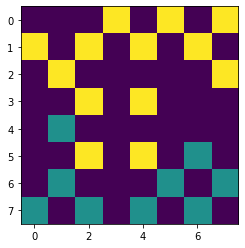

In [38]:
plt.imshow(board)

In [40]:
def king_move(board, player, pos):
    """
    Returns all moves possible by king pieces (dames)
    """
    diag1 = [(ii,sum(pos)-ii) for ii in range(8) if 0 <= sum(pos)-ii <= 7]
    diag2 = [(ii,ii-(pos[0]-pos[1])) for ii in range(8) if 0 <= ii-(pos[0]-pos[1]) <= 7]
    moves = []
    pos_idx = pos_idx = diag2.index(pos)
    for i in range(pos_idx+1,len(diag2)):
        if board[diag2[i]] == -1:
            moves.append(diag2[i])
        else:
            break
    for i in reversed(range(pos_idx + 1)):
        if board[diag2[i]] == -1:
            moves.append(diag2[i])
        else:
            break
    
    pos_idx = pos_idx = diag1.index(pos)

    for i in range(pos_idx+1,len(diag1)):
        if board[diag1[i]] == -1:
            moves.append(diag1[i])
        else:
            break

    for i in reversed(range(len(diag1) - pos_idx)):
        if board[diag1[i]] == -1:
            moves.append(diag1[i])
        else:
            break
    return moves

In [ ]:
def king_jump(board, player, pos):
    x,y = pos
    assert board[x,y] == player
    jumps = []
    # look at all diagonal neighbors
    # unless they fall out of bounds
    moves = king_move(board, player, pos)
    # same for 2nd order diagonal neighbors
    second_order_neighbors = [(x+i,y+j) if 0 <= x+i <= 7 and 0 <= y+j <= 7 else pos for i in [-2,2] for j in [-2,2]]
    # return all jumps where the neighbor has an opponent piece and 2nd order neighbor is empty
    for i,j in zip(neighbors, second_order_neighbors):
        if (board[i[0],i[1]],board[j[0],j[1]]) == (1-player,-1):
            jumps.append(j)
    return jumps

In [41]:
def middle_capture(pos,new_pos):
    assert abs(pos[0]-new_pos[0]) == abs(pos[1]-new_pos[1]) == 2
    return (pos[0]+new_pos[0])//2,(pos[1]+new_pos[1])//2

In [201]:
def capture(board, player, pos, chains = None, depth = 0):
    """
    Finds all chains of capture moves,
    returns all subchains
    """
    if chains is None:
        chains = []
    new_pos = one_jump(board, player, pos)
    depth += 1
    branches = 0
    for p in new_pos:
        branches += 1
        if depth == 1:
            subchain = []
            chains.append(subchain)
        elif depth > 1 and branches == 1:
            subchain = chains[-1]
        elif depth > 1 and branches > 1:
            subchain = chains[-1][:-1].copy()
            chains.append(subchain)
        subchain.append(p)
        hypothetical_board = move(board, player, (pos,p), in_place=False)
        hypothetical_board[middle_capture(pos,p)] = -1
        capture(hypothetical_board, player, p, chains, depth)
    all_capture_moves = []
    for chain in chains:
        for n in range(1,len(chain)+1):
            if chain[:n] not in all_capture_moves:
                all_capture_moves.append(chain[:n])
    return all_capture_moves

In [203]:
board = np.ones((8,8), dtype=np.int)*(-1)
# init whites
board[7,1] = 1
# init blacks
board[4,4] = 0
#board[5,3] = 0
board[2,6] = 0
#board[6,2] = 0
#board[5,5] = 0

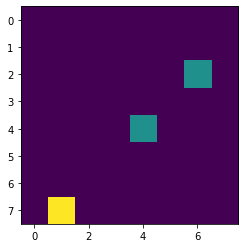

In [204]:
plt.imshow(board)

In [206]:
king_move(board, 1, (7,1))

[(1, 7)]

In [205]:
capture(board, 1, (7,1))

[]